In [1]:
import os
import torch
from transformers import BertForSequenceClassification, BertTokenizer
import torch.nn.functional as F
from torch.utils.data import DataLoader
from data_utils import TextClassificationDataset

with open('./data/class.txt', 'r', encoding='utf-8') as f:
    class_labels = f.read().strip().split('\n')

tokenizer = BertTokenizer.from_pretrained("./bert")
model = BertForSequenceClassification.from_pretrained("./bert", num_labels=len(class_labels))
model.eval()
print("Model loaded.")

test_dataset = TextClassificationDataset('./data/test.txt', tokenizer)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=True)
print("Data loaded.")

Model loaded.
Data loaded.


In [2]:
count = 0
total = len(test_loader)

texts = []
preds = []
labels = []

for batch in test_loader:
    with torch.no_grad():
        outputs = model(**batch)

    # Get the output logits and convert them to probabilities using the softmax function
    probs = outputs.logits.softmax(-1)
    top_probs, top_indices = probs.topk(k=5, sorted=True)
    
    for indice_, label_ in zip(top_indices, batch["labels"]):
        preds.append(indice_.numpy())
        labels.append(label_.numpy())
    for ids_ in batch["input_ids"]:
        texts.append(tokenizer.decode(ids_, skip_special_tokens=True))

    count += 1
    print(f"\r{count/total*100:.3f} %, {count}", end="", flush=True)

2.756 %, 155

KeyboardInterrupt: 

In [4]:
len(texts)

620

In [25]:
"、".join(class_labels)

'创意视频、电视剧、电影、动漫、搞笑、广告、纪录片、教育、科技、旅游、拍客、其他、汽车、亲子、少儿、生活、时尚、体育、网剧、微电影、音乐、游戏、娱乐、资讯、自拍、综艺'

In [11]:
for i, s in enumerate(class_labels):
    print(f"{i}: {s}")

0: 创意视频
1: 电视剧
2: 电影
3: 动漫
4: 搞笑
5: 广告
6: 纪录片
7: 教育
8: 科技
9: 旅游
10: 拍客
11: 其他
12: 汽车
13: 亲子
14: 少儿
15: 生活
16: 时尚
17: 体育
18: 网剧
19: 微电影
20: 音乐
21: 游戏
22: 娱乐
23: 资讯
24: 自拍
25: 综艺


In [10]:
import pandas as pd

df = pd.DataFrame({
    "text": texts,
    "label": [int(l) for l in labels],
    "pred1": [int(p[0]) for p in preds],
    "pred2": [int(p[1]) for p in preds],
    "pred3": [int(p[2]) for p in preds],
    "pred4": [int(p[3]) for p in preds],
    "pred5": [int(p[4]) for p in preds],
})
df

,text,label,pred1,pred2,pred3,pred4,pred5
0,贵 州 哭 妈 娘,11,15,20,11,22,1
1,2017 感 动 中 国 颁 奖 盛 典,25,25,22,20,11,1
2,王 建 林 抗 议 退 出 中 国 足 坛,17,17,23,25,22,11
3,养 生 与 推 拿 护 理,15,15,7,17,23,16
4,佛 说 四 种 清 净 明,7,7,20,15,8,13
...,...,...,...,...,...,...,...
615,奔 跑 吧 兄 弟 神 秘 人,25,25,2,22,20,1
616,xl 微 微 一 笑,1,1,22,2,20,11
617,美 女 段 裙 性 感 热 舞,20,20,1,11,22,15
618,盐 烤 子,15,15,11,24,4,5


In [40]:
for label in ['label', 'pred1', 'pred2', 'pred3', 'pred4', 'pred5']:
    df[label] = df[label].map(lambda x: class_labels[x])

In [44]:
df[90:120]

,text,label,pred1,pred2,pred3,pred4,pred5
90,gmod 逆 风 笑 丧 尸 摸 式,游戏,游戏,电视剧,其他,动漫,搞笑
91,风 火 轮 火 辣 小 跑 车 大 皮 卡,汽车,汽车,亲子,少儿,游戏,动漫
92,明 儿 水 兵 舞 基 本 步 讲 解,体育,体育,音乐,其他,电视剧,娱乐
93,何 炅 小 猪 佩 奇,综艺,少儿,亲子,综艺,其他,音乐
94,溜 溜 车 视 频,汽车,亲子,少儿,游戏,体育,其他
95,爱 是 奥 特 曼,动漫,动漫,少儿,游戏,亲子,其他
96,与 鸭 共 舞 任 达 华 叶 玉 卿,电影,电影,音乐,电视剧,娱乐,动漫
97,性 感 韩 国 的 毒 药,音乐,音乐,电影,电视剧,娱乐,综艺
98,浑 身 刺 痒,电影,电影,电视剧,其他,搞笑,生活
99,美 人 鱼 校 园 的 电 影,电影,电影,动漫,电视剧,娱乐,搞笑


In [12]:
def top_n_accuracy(df, n):
    correct_count = 0
    total_count = len(df)

    for index, row in df.iterrows():
        if row['label'] in row[f'pred1':f'pred{n}'].values:
            correct_count += 1

    return correct_count / total_count

top1_accuracy = top_n_accuracy(df, 1)
top3_accuracy = top_n_accuracy(df, 3)
top5_accuracy = top_n_accuracy(df, 5)

print(f'Top1 Accuracy: {top1_accuracy:.2f}')
print(f'Top3 Accuracy: {top3_accuracy:.2f}')
print(f'Top5 Accuracy: {top5_accuracy:.2f}')

Top1 Accuracy: 0.72
Top3 Accuracy: 0.89
Top5 Accuracy: 0.94


In [8]:
int(labels[0])

11

In [ ]:
def accuracy(outputs, labels, k=1):
    batch_size = labels.size(0)
    
    if k == 1:
        _, preds = torch.max(outputs, dim=1)
        acc = torch.sum(preds == labels).item() / batch_size
    else:
        top_probs, top_indices = outputs.topk(k=k, dim=1)
        correct = top_indices.eq(labels.view(-1, 1).expand_as(top_indices))
        correct_k = correct.view(-1).float().sum(0, keepdim=True).item()
        acc = correct_k / batch_size

    return acc

In [19]:
data = """
batch 200	loss: 2.1326076984405518
batch 400	loss: 1.9284731149673462
batch 600	loss: 1.793778419494629
batch 800	loss: 1.7094240188598633
batch 1000	loss: 1.7828081846237183
batch 1200	loss: 1.5636203289031982
batch 1400	loss: 1.569441318511963
batch 1600	loss: 1.692350149154663
batch 1800	loss: 1.5385127067565918
batch 2000	loss: 1.5160245895385742
batch 2200	loss: 1.433699369430542
batch 2400	loss: 1.5035110712051392
batch 2600	loss: 1.6298747062683105
batch 2800	loss: 1.389277696609497
batch 3000	loss: 1.5057421922683716
batch 3200	loss: 1.5208539962768555
batch 3400	loss: 1.5125325918197632
batch 3600	loss: 1.3537614345550537
batch 3800	loss: 1.301629662513733
batch 4000	loss: 1.3820778131484985
batch 4200	loss: 1.4031190872192383
batch 4400	loss: 1.3066551685333252
batch 4600	loss: 1.4261502027511597
batch 4800	loss: 1.3250348567962646
batch 5000	loss: 1.3207087516784668
batch 5200	loss: 1.249744176864624
batch 5400	loss: 1.280905842781067
batch 5600	loss: 1.4156161546707153
batch 5800	loss: 1.1664949655532837
batch 6000	loss: 1.2303301095962524
""".strip().split("\n")

len(data)

30

In [20]:
xs = []
ys = []

for line in data:
    b, n, l, m = line.split()
    xs.append(int(n))
    ys.append(float(m))

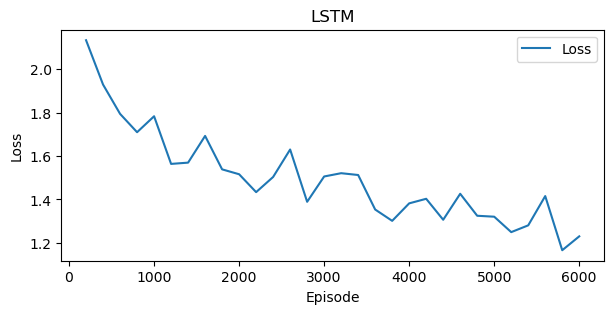

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,3))
plt.xlabel('Episode')
plt.ylabel('Loss')
plt.plot(xs, ys, label="Loss", linestyle='-')
plt.title("LSTM")
plt.legend()
plt.show()

# batch size: 512

In [ ]:
# Accuracy

# lstm 4000 batches:
#  Top1 Accuracy: 0.61
#  Top3 Accuracy: 0.81
#  Top5 Accuracy: 0.88

# lstm 6000 batches:
#  Top1 Accuracy: 0.62
#  Top3 Accuracy: 0.82
#  Top5 Accuracy: 0.89

# bert 3000 batches
#  Top1 Accuracy: 0.67
#  Top3 Accuracy: 0.86
#  Top5 Accuracy: 0.92

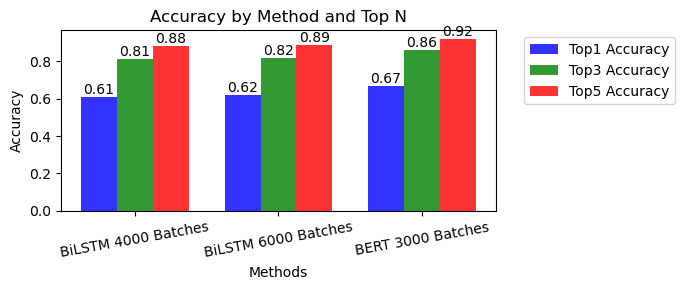

In [34]:
import matplotlib.pyplot as plt

# Data
methods = ['BiLSTM 4000 Batches', 'BiLSTM 6000 Batches', 'BERT 3000 Batches']
top1_accuracies = [0.61, 0.62, 0.67]
top3_accuracies = [0.81, 0.82, 0.86]
top5_accuracies = [0.88, 0.89, 0.92]

# Plot
fig, ax = plt.subplots(figsize=(7, 3))
bar_width = 0.25
opacity = 0.8

index = list(range(len(methods)))
rects1 = plt.bar(index, top1_accuracies, bar_width,
                 alpha=opacity, color='b', label='Top1 Accuracy')

rects2 = plt.bar([i + bar_width for i in index], top3_accuracies, bar_width,
                 alpha=opacity, color='g', label='Top3 Accuracy')

rects3 = plt.bar([i + 2 * bar_width for i in index], top5_accuracies, bar_width,
                 alpha=opacity, color='r', label='Top5 Accuracy')

plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.title('Accuracy by Method and Top N')
plt.xticks([i + bar_width for i in index], methods, rotation=10)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Add labels
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height, '{:.2f}'.format(height),
                ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

plt.tight_layout()
plt.savefig('accuracy_comparison.png', dpi=300)
plt.show()